In [99]:
# For data manipulation
import pandas as pd 


# Garbage Collector to free up memory
import gc                         
gc.enable()                       # Activate 

In [100]:
#install kaggleApi
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi({"username":"athinakasimidou","key":"77233655dde27b7c0e8c1e23587d96af"})
api.authenticate()
files = api.competition_download_files('instacart-market-basket-analysis')

In [101]:
#install Zipfile
import zipfile
with zipfile.ZipFile('instacart-market-basket-analysis.zip', 'r') as zip_ref:
    zip_ref.extractall('./input')

In [102]:
#install os
import os
working_directory = os.getcwd()+'/input'
os.chdir(working_directory)
for file in os.listdir(working_directory):   # get the list of files
    if zipfile.is_zipfile(file): # if it is a zipfile, extract it
        with zipfile.ZipFile(file) as item: # treat the file as a zip
           item.extractall()  # extract it in the working directory

In [103]:
#read csv
orders = pd.read_csv('../input/orders.csv')
order_products_train = pd.read_csv('../input/order_products__train.csv')
order_products_prior = pd.read_csv('../input/order_products__prior.csv')
products = pd.read_csv('../input/products.csv')
aisles = pd.read_csv('../input/aisles.csv')
departments = pd.read_csv('../input/departments.csv')

In [104]:
#### Remove triple quotes to trim your dataset and experiment with your data
# COMMANDS FOR CODING TESTING - Get 10% of users 
orders = orders.loc[orders.user_id.isin(orders.user_id.drop_duplicates().sample(frac=0.1, random_state=25))]

In [105]:
#Show the head of the arrays
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
54,2565571,7,prior,1,3,9,NaN
55,2402008,7,prior,2,1,19,30.0
56,121053,7,prior,3,0,18,30.0
57,1695742,7,prior,4,2,10,9.0
58,3321109,7,prior,5,5,18,3.0


In [106]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [107]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [108]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [109]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [110]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [111]:
# We convert character variables into category. 
# In Python, a categorical variable is called category and has a fixed number of different values
aisles['aisle'] = aisles['aisle'].astype('category')
departments['department'] = departments['department'].astype('category')
orders['eval_set'] = orders['eval_set'].astype('category')
products['product_name'] = products['product_name'].astype('category')

In [112]:
#Merge the orders DF with order_products_prior by their order_id, keep only these rows with order_id that they are appear on both DFs
op = orders.merge(order_products_prior, on='order_id', how='inner')
op.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2565571,7,prior,1,3,9,NaN,45628,1,0
1,2565571,7,prior,1,3,9,NaN,39275,2,0
2,2565571,7,prior,1,3,9,NaN,6361,3,0
3,2565571,7,prior,1,3,9,NaN,45066,4,0
4,2565571,7,prior,1,3,9,NaN,13249,5,0


In [113]:
#Create the arrays of last five orders for each user
op['order_number_back'] = op.groupby('user_id')['order_number'].transform(max) - op.order_number +1
op.head(15)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,order_number_back
0,2565571,7,prior,1,3,9,NaN,45628,1,0,20
1,2565571,7,prior,1,3,9,NaN,39275,2,0,20
2,2565571,7,prior,1,3,9,NaN,6361,3,0,20
3,2565571,7,prior,1,3,9,NaN,45066,4,0,20
4,2565571,7,prior,1,3,9,NaN,13249,5,0,20
5,2565571,7,prior,1,3,9,NaN,31683,6,0,20
6,2565571,7,prior,1,3,9,NaN,519,7,0,20
7,2565571,7,prior,1,3,9,NaN,37999,8,0,20
8,2565571,7,prior,1,3,9,NaN,49508,9,0,20
9,2565571,7,prior,1,3,9,NaN,29871,10,0,20


In [114]:
op5 = op[op.order_number_back <= 5]
op5.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,order_number_back
148,2425840,7,prior,16,0,13,11.0,37602,1,1,5
149,2425840,7,prior,16,0,13,11.0,40852,2,1,5
150,2425840,7,prior,16,0,13,11.0,21137,3,1,5
151,2425840,7,prior,16,0,13,11.0,17638,4,1,5
152,2425840,7,prior,16,0,13,11.0,42265,5,0,5


In [115]:
#CREATE FEATURES
#Create distinct groups for each user, save the results to the user array
user = op.groupby('user_id')['order_number'].max().to_frame('user_t_orders') #
user = user.reset_index()
user.head()

,user_id,user_t_orders
0,7,20
1,14,13
2,22,15
3,24,18
4,29,18


In [116]:
#Create u_reorder_ratio
u_reorder = op.groupby('user_id')['reordered'].mean().to_frame('u_reordered_ratio') #
u_reorder = u_reorder.reset_index()
u_reorder.head()

,user_id,u_reordered_ratio
0,7,0.669903
1,14,0.323810
2,22,0.507246
3,24,0.526316
4,29,0.702222


In [117]:
#Create u_reordered_ratio_5
u_reorder5 = op5.groupby('user_id')['reordered'].mean().to_frame('u_reordered_ratio_5') #
u_reorder5 = u_reorder5.reset_index()
u_reorder5.head()

,user_id,u_reordered_ratio_5
0,7,0.637931
1,14,0.435897
2,22,0.760000
3,24,0.583333
4,29,0.775000


In [118]:
#Merge features to user array
user=user.merge(u_reorder,on='user_id',how='left')#
del u_reorder
gc.collect()

user.head()

,user_id,user_t_orders,u_reordered_ratio
0,7,20,0.669903
1,14,13,0.323810
2,22,15,0.507246
3,24,18,0.526316
4,29,18,0.702222


In [119]:
#Merge features to user array
user=user.merge(u_reorder5,on='user_id',how='left')#
del u_reorder5
gc.collect()

user.head()

,user_id,user_t_orders,u_reordered_ratio,u_reordered_ratio_5
0,7,20,0.669903,0.637931
1,14,13,0.323810,0.435897
2,22,15,0.507246,0.760000
3,24,18,0.526316,0.583333
4,29,18,0.702222,0.775000


In [120]:
#Create mean_days
days = op.groupby('user_id')['days_since_prior_order'].mean().to_frame('mean_days')
days = days.reset_index()
days.head()

,user_id,mean_days
0,7,13.546392
1,14,24.570732
2,22,11.952381
3,24,15.162162
4,29,11.793427


In [121]:
#Create mean_days_5
days5 = op5.groupby('user_id')['days_since_prior_order'].mean().to_frame('mean_days_5')
days5 = days5.reset_index()
days5.head()

,user_id,mean_days_5
0,7,11.810345
1,14,20.961538
2,22,6.120000
3,24,9.083333
4,29,14.112500


In [122]:
#Merge features to user array
user = user.merge(days, on='user_id', how='left')
del days
gc.collect()
user.head()

,user_id,user_t_orders,u_reordered_ratio,u_reordered_ratio_5,mean_days
0,7,20,0.669903,0.637931,13.546392
1,14,13,0.323810,0.435897,24.570732
2,22,15,0.507246,0.760000,11.952381
3,24,18,0.526316,0.583333,15.162162
4,29,18,0.702222,0.775000,11.793427


In [123]:
#Merge features to user array
user = user.merge(days5, on='user_id', how='left')
del days5
gc.collect()
user.head()

,user_id,user_t_orders,u_reordered_ratio,u_reordered_ratio_5,mean_days,mean_days_5
0,7,20,0.669903,0.637931,13.546392,11.810345
1,14,13,0.323810,0.435897,24.570732,20.961538
2,22,15,0.507246,0.760000,11.952381,6.120000
3,24,18,0.526316,0.583333,15.162162,9.083333
4,29,18,0.702222,0.775000,11.793427,14.112500


In [124]:
#Create max_basket
user_max = op.groupby(['user_id','order_id'])['add_to_cart_order'].max().to_frame('max_basket')
user_max.head()

max_basket
user_id order_id            
7       23391             11
        121053            24
        369015             5
        565870             9
        776265             8

In [125]:
#Create mean_basket
user_max_ratio = user_max.groupby('user_id')['max_basket'].mean().to_frame('mean_basket')
user_max_ratio = user_max_ratio.reset_index()
user_max_ratio.head()

,user_id,mean_basket
0,7,10.300000
1,14,16.153846
2,22,4.600000
3,24,2.111111
4,29,12.500000


In [126]:
#Merge features to user array
user = user.merge(user_max_ratio, on='user_id', how='left')
del user_max_ratio
gc.collect()
user.head()

,user_id,user_t_orders,u_reordered_ratio,u_reordered_ratio_5,mean_days,mean_days_5,mean_basket
0,7,20,0.669903,0.637931,13.546392,11.810345,10.300000
1,14,13,0.323810,0.435897,24.570732,20.961538,16.153846
2,22,15,0.507246,0.760000,11.952381,6.120000,4.600000
3,24,18,0.526316,0.583333,15.162162,9.083333,2.111111
4,29,18,0.702222,0.775000,11.793427,14.112500,12.500000


In [127]:
#Create max_basket5
user_max5 = op5.groupby(['user_id','order_id'])['add_to_cart_order'].max().to_frame('max_basket5')
user_max5.head()

max_basket5
user_id order_id             
7       23391              11
        369015              5
        2425840            17
        2452257            12
        2984707            13

In [128]:
#Create mean_basket5
user_max_ratio5 = user_max5.groupby('user_id')['max_basket5'].mean().to_frame('mean_basket5')
user_max_ratio5 = user_max_ratio5.reset_index()
user_max_ratio5.head()

,user_id,mean_basket5
0,7,11.6
1,14,15.6
2,22,5.0
3,24,2.4
4,29,16.0


In [129]:
#Merge features to user array
user = user.merge(user_max_ratio5, on='user_id', how='left')
del user_max_ratio5
gc.collect()
user.head()

,user_id,user_t_orders,u_reordered_ratio,u_reordered_ratio_5,mean_days,mean_days_5,mean_basket,mean_basket5
0,7,20,0.669903,0.637931,13.546392,11.810345,10.300000,11.6
1,14,13,0.323810,0.435897,24.570732,20.961538,16.153846,15.6
2,22,15,0.507246,0.760000,11.952381,6.120000,4.600000,5.0
3,24,18,0.526316,0.583333,15.162162,9.083333,2.111111,2.4
4,29,18,0.702222,0.775000,11.793427,14.112500,12.500000,16.0


In [130]:
#Detele non useful features from user array
del  user_max, user_max5
gc.collect()
user.head()

,user_id,user_t_orders,u_reordered_ratio,u_reordered_ratio_5,mean_days,mean_days_5,mean_basket,mean_basket5
0,7,20,0.669903,0.637931,13.546392,11.810345,10.300000,11.6
1,14,13,0.323810,0.435897,24.570732,20.961538,16.153846,15.6
2,22,15,0.507246,0.760000,11.952381,6.120000,4.600000,5.0
3,24,18,0.526316,0.583333,15.162162,9.083333,2.111111,2.4
4,29,18,0.702222,0.775000,11.793427,14.112500,12.500000,16.0


In [131]:
# Create distinct groups for each product and save the result for each product to the products array
prd = op.groupby('product_id')['order_id'].count().to_frame('prd_t_purchases') #
prd = prd.reset_index()
prd.head()

,product_id,prd_t_purchases
0,1,205
1,2,13
2,3,15
3,4,37
4,6,1


In [132]:
#Create prd_t_purchases5
prd5 = op5.groupby('product_id')['order_id'].count().to_frame('prd_t_purchases5') #
prd5 = prd5.reset_index()
prd5.head()

,product_id,prd_t_purchases5
0,1,49
1,2,4
2,3,4
3,4,21
4,7,1


In [133]:
#Merge features to the product array
prd = prd.merge(prd5, on='product_id', how='left')
del prd5
gc.collect()
prd['prd_t_purchases5'] = prd['prd_t_purchases5'].fillna(0)
prd.head()

,product_id,prd_t_purchases,prd_t_purchases5
0,1,205,49.0
1,2,13,4.0
2,3,15,4.0
3,4,37,21.0
4,6,1,0.0


In [134]:
#REMOVE PRODUCTS WITH LESS THAN 40 PURCHASES
# execution time: 25 sec
# the x on lambda function is a temporary variable which represents each group
# shape[0] on a DataFrame returns the number of rows
p_reorder = op.groupby('product_id').filter(lambda x: x.shape[0] >40)#####
p_reorder.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,order_number_back
1,2565571,7,prior,1,3,9,NaN,39275,2,0,20
2,2565571,7,prior,1,3,9,NaN,6361,3,0,20
3,2565571,7,prior,1,3,9,NaN,45066,4,0,20
4,2565571,7,prior,1,3,9,NaN,13249,5,0,20
5,2565571,7,prior,1,3,9,NaN,31683,6,0,20


In [135]:
#Create p_reorder_ratio
p_reorder = op.groupby('product_id')['reordered'].mean().to_frame('p_reorder_ratio')
p_reorder = p_reorder.reset_index()
p_reorder.head()

,product_id,p_reorder_ratio
0,1,0.692683
1,2,0.230769
2,3,0.466667
3,4,0.540541
4,6,0.000000


In [136]:
#Merge features to the product array
prd = prd.merge(p_reorder, on='product_id', how='left')
del p_reorder
gc.collect()
prd.head()

,product_id,prd_t_purchases,prd_t_purchases5,p_reorder_ratio
0,1,205,49.0,0.692683
1,2,13,4.0,0.230769
2,3,15,4.0,0.466667
3,4,37,21.0,0.540541
4,6,1,0.0,0.000000


In [137]:
#Fill NaN with 0
prd['p_reorder_ratio'] = prd['p_reorder_ratio'].fillna(0) #
prd.head()

,product_id,prd_t_purchases,prd_t_purchases5,p_reorder_ratio
0,1,205,49.0,0.692683
1,2,13,4.0,0.230769
2,3,15,4.0,0.466667
3,4,37,21.0,0.540541
4,6,1,0.0,0.000000


In [138]:
#Create p_reorder_ratio5
p_reorder5 = op5.groupby('product_id')['reordered'].mean().to_frame('p_reorder_ratio5')
p_reorder5 = p_reorder5.reset_index()
p_reorder5.head()

,product_id,p_reorder_ratio5
0,1,0.530612
1,2,0.500000
2,3,0.500000
3,4,0.571429
4,7,0.000000


In [139]:
#Merge features to the product array
prd = prd.merge(p_reorder5, on='product_id', how='left')
del p_reorder5
gc.collect()
prd['p_reorder_ratio5'] = prd['p_reorder_ratio5'].fillna(0)
prd.head()

,product_id,prd_t_purchases,prd_t_purchases5,p_reorder_ratio,p_reorder_ratio5
0,1,205,49.0,0.692683,0.530612
1,2,13,4.0,0.230769,0.500000
2,3,15,4.0,0.466667,0.500000
3,4,37,21.0,0.540541,0.571429
4,6,1,0.0,0.000000,0.000000


In [140]:
#Create aop_mean
aop = op.groupby('product_id')['add_to_cart_order'].mean().to_frame("aop_mean")
aop = aop.reset_index()
aop.head()

,product_id,aop_mean
0,1,7.878049
1,2,11.384615
2,3,4.533333
3,4,6.972973
4,6,26.000000


In [141]:
#Merge features to the product array
prd = prd.merge(aop, on='product_id', how='left')
del aop
gc.collect()
prd.head()

,product_id,prd_t_purchases,prd_t_purchases5,p_reorder_ratio,p_reorder_ratio5,aop_mean
0,1,205,49.0,0.692683,0.530612,7.878049
1,2,13,4.0,0.230769,0.500000,11.384615
2,3,15,4.0,0.466667,0.500000,4.533333
3,4,37,21.0,0.540541,0.571429,6.972973
4,6,1,0.0,0.000000,0.000000,26.000000


In [142]:
#Create aop_mean5
aop5 = op5.groupby('product_id')['add_to_cart_order'].mean().to_frame("aop_mean5")
aop5 = aop5.reset_index()
aop5.head()

,product_id,aop_mean5
0,1,5.530612
1,2,17.750000
2,3,4.000000
3,4,7.285714
4,7,7.000000


In [143]:
#Merge features to the product array
prd = prd.merge(aop5, on='product_id', how='left')
del aop5
gc.collect()
prd.head()

,product_id,prd_t_purchases,prd_t_purchases5,p_reorder_ratio,p_reorder_ratio5,aop_mean,aop_mean5
0,1,205,49.0,0.692683,0.530612,7.878049,5.530612
1,2,13,4.0,0.230769,0.500000,11.384615,17.750000
2,3,15,4.0,0.466667,0.500000,4.533333,4.000000
3,4,37,21.0,0.540541,0.571429,6.972973,7.285714
4,6,1,0.0,0.000000,0.000000,26.000000,NaN


In [144]:
# Create distinct groups for each combination of user and product, count orders, save the result for each user X product to a new DataFrame 
uxp = op.groupby(['user_id', 'product_id'])['order_id'].count().to_frame('uxp_t_bought') #
uxp = uxp.reset_index()
uxp.head()

,user_id,product_id,uxp_t_bought
0,7,274,1
1,7,519,2
2,7,4920,7
3,7,4945,3
4,7,6361,5


In [145]:
#Create Times_Bought_N
times = op.groupby(['user_id', 'product_id'])[['order_id']].count()
times.columns = ['Times_Bought_N']
times.head()

Times_Bought_N
user_id product_id                
7       274                      1
        519                      2
        4920                     7
        4945                     3
        6361                     5

In [146]:
#Create total_orders
total_orders = op.groupby('user_id')['order_number'].max().to_frame('total_orders') #
total_orders.head()

,total_orders
user_id,
7,20
14,13
22,15
24,18
29,18


In [147]:
#Create first_order_number
first_order_no = op.groupby(['user_id', 'product_id'])['order_number'].min().to_frame('first_order_number')
first_order_no  = first_order_no.reset_index()
first_order_no.head()

,user_id,product_id,first_order_number
0,7,274,2
1,7,519,1
2,7,4920,2
3,7,4945,16
4,7,6361,1


In [148]:
#Merge features to the user x product array
span = pd.merge(total_orders, first_order_no, on='user_id', how='right')
span.head()

,user_id,total_orders,product_id,first_order_number
0,7,20,274,2
1,7,20,519,1
2,7,20,4920,2
3,7,20,4945,16
4,7,20,6361,1


In [149]:
# The +1 includes in the difference the first order were the product has been purchased
span['Order_Range_D'] = span.total_orders - span.first_order_number + 1
span.head()

,user_id,total_orders,product_id,first_order_number,Order_Range_D
0,7,20,274,2,19
1,7,20,519,1,20
2,7,20,4920,2,19
3,7,20,4945,16,5
4,7,20,6361,1,20


In [150]:
#Merge features to the user x product array
uxp_ratio = pd.merge(times, span, on=['user_id', 'product_id'], how='left')
uxp_ratio.head()

,user_id,product_id,Times_Bought_N,total_orders,first_order_number,Order_Range_D
0,7,274,1,20,2,19
1,7,519,2,20,1,20
2,7,4920,7,20,2,19
3,7,4945,3,20,16,5
4,7,6361,5,20,1,20


In [151]:
#Remove temporary DataFrames
del [times, first_order_no, span]

In [152]:
#Create uxp_reorder_ratio
uxp_ratio['uxp_reorder_ratio'] = uxp_ratio.Times_Bought_N / uxp_ratio.Order_Range_D ##
uxp_ratio.head()

,user_id,product_id,Times_Bought_N,total_orders,first_order_number,Order_Range_D,uxp_reorder_ratio
0,7,274,1,20,2,19,0.052632
1,7,519,2,20,1,20,0.100000
2,7,4920,7,20,2,19,0.368421
3,7,4945,3,20,16,5,0.600000
4,7,6361,5,20,1,20,0.250000


In [153]:
#Merge features to the user x product array
uxp = uxp.merge(uxp_ratio, on=['user_id', 'product_id'], how='left')
del uxp_ratio
uxp.head()

,user_id,product_id,uxp_t_bought,Times_Bought_N,total_orders,first_order_number,Order_Range_D,uxp_reorder_ratio
0,7,274,1,1,20,2,19,0.052632
1,7,519,2,2,20,1,20,0.100000
2,7,4920,7,7,20,2,19,0.368421
3,7,4945,3,3,20,16,5,0.600000
4,7,6361,5,5,20,1,20,0.250000


In [154]:
#Delete non useful features
uxp = uxp.drop(['total_orders', 'first_order_number', 'Order_Range_D', 'Times_Bought_N'], axis=1)
uxp.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio
0,7,274,1,0.052632
1,7,519,2,0.100000
2,7,4920,7,0.368421
3,7,4945,3,0.600000
4,7,6361,5,0.250000


In [155]:
#Create times_last5
last_five = op5.groupby(['user_id','product_id'])['order_id'].count().to_frame('times_last5')
last_five.head(10)

times_last5
user_id product_id             
7       4920                  2
        4945                  3
        8277                  1
        8518                  1
        9598                  1
        10504                 1
        11520                 1
        12196                 2
        13198                 2
        15592                 2

In [156]:
uxp_mean5 = op5.groupby(['user_id', 'product_id'])['reordered'].mean().to_frame('uxp_mean_5')
uxp_mean5.head()

uxp_mean_5
user_id product_id            
7       4920          1.000000
        4945          0.666667
        8277          1.000000
        8518          1.000000
        9598          1.000000

In [157]:
#Merge features to the user x product array
uxp = uxp.merge(last_five, on=['user_id', 'product_id'], how='left')
uxp['times_last5'] = uxp['times_last5'].fillna(0)
del last_five
uxp.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5
0,7,274,1,0.052632,0.0
1,7,519,2,0.100000,0.0
2,7,4920,7,0.368421,2.0
3,7,4945,3,0.600000,3.0
4,7,6361,5,0.250000,0.0


In [158]:
uxp = uxp.merge(uxp_mean5, on=['user_id', 'product_id'], how='left')
del uxp_mean5
uxp['uxp_mean_5'] = uxp['uxp_mean_5'].fillna(0)
uxp.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,uxp_mean_5
0,7,274,1,0.052632,0.0,0.000000
1,7,519,2,0.100000,0.0,0.000000
2,7,4920,7,0.368421,2.0,1.000000
3,7,4945,3,0.600000,3.0,0.666667
4,7,6361,5,0.250000,0.0,0.000000


In [159]:
#Create uxp_aop
uxp_aop= op.groupby(['user_id', 'product_id'])['add_to_cart_order'].mean().to_frame('uxp_aop')
uxp_aop.head()

uxp_aop
user_id product_id           
7       274         16.000000
        519         10.500000
        4920         4.714286
        4945        11.333333
        6361         7.200000

In [160]:
#Create uxp_aop5
uxp_aop5 = op5.groupby(['user_id', 'product_id'])['add_to_cart_order'].mean().to_frame('uxp_aop_5')
uxp_aop5.head()

uxp_aop_5
user_id product_id           
7       4920         8.000000
        4945        11.333333
        8277         3.000000
        8518         5.000000
        9598         5.000000

In [161]:
uxp = uxp.merge(uxp_aop, on=['user_id', 'product_id'], how='left')
del uxp_aop
uxp['uxp_aop'] = uxp['uxp_aop'].fillna(0)
uxp.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,uxp_mean_5,uxp_aop
0,7,274,1,0.052632,0.0,0.000000,16.000000
1,7,519,2,0.100000,0.0,0.000000,10.500000
2,7,4920,7,0.368421,2.0,1.000000,4.714286
3,7,4945,3,0.600000,3.0,0.666667,11.333333
4,7,6361,5,0.250000,0.0,0.000000,7.200000


In [162]:
#Merge features to the user x product array
uxp = uxp.merge(uxp_aop5, on=['user_id', 'product_id'], how='left')
del uxp_aop5
uxp['uxp_aop_5'] = uxp['uxp_aop_5'].fillna(0)
uxp.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,uxp_mean_5,uxp_aop,uxp_aop_5
0,7,274,1,0.052632,0.0,0.000000,16.000000,0.000000
1,7,519,2,0.100000,0.0,0.000000,10.500000,0.000000
2,7,4920,7,0.368421,2.0,1.000000,4.714286,8.000000
3,7,4945,3,0.600000,3.0,0.666667,11.333333,11.333333
4,7,6361,5,0.250000,0.0,0.000000,7.200000,0.000000


In [163]:
#Create uxp_dow
uxp_dow= op.groupby(['user_id', 'product_id'])['order_dow'].mean().to_frame('uxp_dow')
uxp_dow.head()

uxp_dow
user_id product_id          
7       274         1.000000
        519         1.500000
        4920        1.571429
        4945        0.000000
        6361        2.200000

In [164]:
uxp_dow5= op5.groupby(['user_id', 'product_id'])['order_dow'].mean().to_frame('uxp_dow5')
uxp_dow5.head()

uxp_dow5
user_id product_id          
7       4920             0.0
        4945             0.0
        8277             0.0
        8518             0.0
        9598             3.0

In [165]:
uxp_hour= op.groupby(['user_id', 'product_id'])['order_hour_of_day'].mean().to_frame('uxp_hour')
uxp_hour.head()

uxp_hour
user_id product_id           
7       274         19.000000
        519         13.500000
        4920        14.285714
        4945        10.666667
        6361        14.800000

In [166]:
uxp_hour5= op5.groupby(['user_id', 'product_id'])['order_hour_of_day'].mean().to_frame('uxp_hour5')
uxp_hour5.head()

uxp_hour5
user_id product_id           
7       4920        11.500000
        4945        10.666667
        8277        10.000000
        8518         9.000000
        9598         9.000000

In [167]:
uxp = uxp.merge(uxp_dow, on=['user_id', 'product_id'], how='left')
del uxp_dow
uxp['uxp_dow'] = uxp['uxp_dow'].fillna(0)
uxp.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,uxp_mean_5,uxp_aop,uxp_aop_5,uxp_dow
0,7,274,1,0.052632,0.0,0.000000,16.000000,0.000000,1.000000
1,7,519,2,0.100000,0.0,0.000000,10.500000,0.000000,1.500000
2,7,4920,7,0.368421,2.0,1.000000,4.714286,8.000000,1.571429
3,7,4945,3,0.600000,3.0,0.666667,11.333333,11.333333,0.000000
4,7,6361,5,0.250000,0.0,0.000000,7.200000,0.000000,2.200000


In [168]:
uxp = uxp.merge(uxp_dow5, on=['user_id', 'product_id'], how='left')
del uxp_dow5
uxp['uxp_dow5'] = uxp['uxp_dow5'].fillna(0)
uxp.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,uxp_mean_5,uxp_aop,uxp_aop_5,uxp_dow,uxp_dow5
0,7,274,1,0.052632,0.0,0.000000,16.000000,0.000000,1.000000,0.0
1,7,519,2,0.100000,0.0,0.000000,10.500000,0.000000,1.500000,0.0
2,7,4920,7,0.368421,2.0,1.000000,4.714286,8.000000,1.571429,0.0
3,7,4945,3,0.600000,3.0,0.666667,11.333333,11.333333,0.000000,0.0
4,7,6361,5,0.250000,0.0,0.000000,7.200000,0.000000,2.200000,0.0


In [169]:
uxp = uxp.merge(uxp_hour, on=['user_id', 'product_id'], how='left')
del uxp_hour
uxp['uxp_hour'] = uxp['uxp_hour'].fillna(0)
uxp.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,uxp_mean_5,uxp_aop,uxp_aop_5,uxp_dow,uxp_dow5,uxp_hour
0,7,274,1,0.052632,0.0,0.000000,16.000000,0.000000,1.000000,0.0,19.000000
1,7,519,2,0.100000,0.0,0.000000,10.500000,0.000000,1.500000,0.0,13.500000
2,7,4920,7,0.368421,2.0,1.000000,4.714286,8.000000,1.571429,0.0,14.285714
3,7,4945,3,0.600000,3.0,0.666667,11.333333,11.333333,0.000000,0.0,10.666667
4,7,6361,5,0.250000,0.0,0.000000,7.200000,0.000000,2.200000,0.0,14.800000


In [170]:
uxp = uxp.merge(uxp_hour5, on=['user_id', 'product_id'], how='left')
del uxp_hour5
uxp['uxp_hour5'] = uxp['uxp_hour5'].fillna(0)
uxp.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,uxp_mean_5,uxp_aop,uxp_aop_5,uxp_dow,uxp_dow5,uxp_hour,uxp_hour5
0,7,274,1,0.052632,0.0,0.000000,16.000000,0.000000,1.000000,0.0,19.000000,0.000000
1,7,519,2,0.100000,0.0,0.000000,10.500000,0.000000,1.500000,0.0,13.500000,0.000000
2,7,4920,7,0.368421,2.0,1.000000,4.714286,8.000000,1.571429,0.0,14.285714,11.500000
3,7,4945,3,0.600000,3.0,0.666667,11.333333,11.333333,0.000000,0.0,10.666667,10.666667
4,7,6361,5,0.250000,0.0,0.000000,7.200000,0.000000,2.200000,0.0,14.800000,0.000000


In [171]:
#Remove temporary DataFrames
del op
gc.collect()

100

In [172]:
#Merge uxp features with the user features
#Store the results on a new DataFrame
data = uxp.merge(user, on='user_id', how='left')
data.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,uxp_mean_5,uxp_aop,uxp_aop_5,uxp_dow,uxp_dow5,uxp_hour,uxp_hour5,user_t_orders,u_reordered_ratio,u_reordered_ratio_5,mean_days,mean_days_5,mean_basket,mean_basket5
0,7,274,1,0.052632,0.0,0.000000,16.000000,0.000000,1.000000,0.0,19.000000,0.000000,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6
1,7,519,2,0.100000,0.0,0.000000,10.500000,0.000000,1.500000,0.0,13.500000,0.000000,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6
2,7,4920,7,0.368421,2.0,1.000000,4.714286,8.000000,1.571429,0.0,14.285714,11.500000,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6
3,7,4945,3,0.600000,3.0,0.666667,11.333333,11.333333,0.000000,0.0,10.666667,10.666667,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6
4,7,6361,5,0.250000,0.0,0.000000,7.200000,0.000000,2.200000,0.0,14.800000,0.000000,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6


In [173]:
#Remove temporary DataFrames
del uxp, user
gc.collect()

40

In [174]:
#Merge uxp & user features (the new DataFrame) with prd features
data = data.merge(prd, on='product_id', how='left') #
data.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,uxp_mean_5,uxp_aop,uxp_aop_5,uxp_dow,uxp_dow5,...,mean_days,mean_days_5,mean_basket,mean_basket5,prd_t_purchases,prd_t_purchases5,p_reorder_ratio,p_reorder_ratio5,aop_mean,aop_mean5
0,7,274,1,0.052632,0.0,0.000000,16.000000,0.000000,1.000000,0.0,...,13.546392,11.810345,10.3,11.6,232,54.0,0.301724,0.203704,10.719828,9.129630
1,7,519,2,0.100000,0.0,0.000000,10.500000,0.000000,1.500000,0.0,...,13.546392,11.810345,10.3,11.6,111,36.0,0.657658,0.666667,8.549550,7.194444
2,7,4920,7,0.368421,2.0,1.000000,4.714286,8.000000,1.571429,0.0,...,13.546392,11.810345,10.3,11.6,8126,2526.0,0.666010,0.640538,8.335343,8.241489
3,7,4945,3,0.600000,3.0,0.666667,11.333333,11.333333,0.000000,0.0,...,13.546392,11.810345,10.3,11.6,599,201.0,0.732888,0.716418,7.193656,7.004975
4,7,6361,5,0.250000,0.0,0.000000,7.200000,0.000000,2.200000,0.0,...,13.546392,11.810345,10.3,11.6,333,78.0,0.756757,0.717949,7.657658,6.525641


In [175]:
#Remove temporary DataFrames
del prd
gc.collect()

40

In [176]:
## First approach:
# In two steps keep only the future orders from all customers: train & test 
orders_future = orders[((orders.eval_set=='train') | (orders.eval_set=='test'))]
orders_future = orders_future[ ['user_id', 'eval_set', 'order_id'] ]
orders_future.head(10)

## Second approach (if you want to test it you have to re-run the notebook):
# In one step keep only the future orders from all customers: train & test 
#orders_future = orders.loc[((orders.eval_set=='train') | (orders.eval_set=='test')), ['user_id', 'eval_set', 'order_id'] ]
#orders_future.head(10)

## Third approach (if you want to test it you have to re-run the notebook):
# In one step exclude all the prior orders so to deal with the future orders from all customers
#orders_future = orders.loc[orders.eval_set!='prior', ['user_id', 'eval_set', 'order_id'] ]
#orders_future.head(10)

,user_id,eval_set,order_id
74,7,train,525192
129,14,train,2316178
272,22,test,139655
296,24,train,965160
439,29,train,3110252
485,34,train,698604
570,38,train,3173750
588,40,test,2431024
669,48,train,2924697
999,64,train,2639013


In [177]:
# bring the info of the future orders to data DF
data = data.merge(orders_future, on='user_id', how='left')
data.head(10)

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,uxp_mean_5,uxp_aop,uxp_aop_5,uxp_dow,uxp_dow5,...,mean_basket,mean_basket5,prd_t_purchases,prd_t_purchases5,p_reorder_ratio,p_reorder_ratio5,aop_mean,aop_mean5,eval_set,order_id
0,7,274,1,0.052632,0.0,0.000000,16.000000,0.000000,1.000000,0.0,...,10.3,11.6,232,54.0,0.301724,0.203704,10.719828,9.129630,train,525192
1,7,519,2,0.100000,0.0,0.000000,10.500000,0.000000,1.500000,0.0,...,10.3,11.6,111,36.0,0.657658,0.666667,8.549550,7.194444,train,525192
2,7,4920,7,0.368421,2.0,1.000000,4.714286,8.000000,1.571429,0.0,...,10.3,11.6,8126,2526.0,0.666010,0.640538,8.335343,8.241489,train,525192
3,7,4945,3,0.600000,3.0,0.666667,11.333333,11.333333,0.000000,0.0,...,10.3,11.6,599,201.0,0.732888,0.716418,7.193656,7.004975,train,525192
4,7,6361,5,0.250000,0.0,0.000000,7.200000,0.000000,2.200000,0.0,...,10.3,11.6,333,78.0,0.756757,0.717949,7.657658,6.525641,train,525192
5,7,8277,3,0.375000,1.0,1.000000,3.333333,3.000000,2.666667,0.0,...,10.3,11.6,8990,2147.0,0.755617,0.699115,7.466518,7.854215,train,525192
6,7,8518,3,0.157895,1.0,1.000000,7.000000,5.000000,0.666667,0.0,...,10.3,11.6,6828,2362.0,0.627124,0.596105,9.239309,9.638442,train,525192
7,7,9598,3,0.157895,1.0,1.000000,11.666667,5.000000,1.333333,3.0,...,10.3,11.6,523,98.0,0.684512,0.693878,9.445507,10.000000,train,525192
8,7,10504,1,0.200000,1.0,0.000000,8.000000,8.000000,0.000000,0.0,...,10.3,11.6,731,193.0,0.492476,0.398964,9.121751,10.036269,train,525192
9,7,10895,3,0.166667,0.0,0.000000,1.000000,0.000000,1.000000,0.0,...,10.3,11.6,547,172.0,0.594150,0.575581,9.665448,9.761628,train,525192


In [178]:
#Keep only the customers who we know what they bought in their future order
data_train = data[data.eval_set=='train'] #
data_train.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,uxp_mean_5,uxp_aop,uxp_aop_5,uxp_dow,uxp_dow5,...,mean_basket,mean_basket5,prd_t_purchases,prd_t_purchases5,p_reorder_ratio,p_reorder_ratio5,aop_mean,aop_mean5,eval_set,order_id
0,7,274,1,0.052632,0.0,0.000000,16.000000,0.000000,1.000000,0.0,...,10.3,11.6,232,54.0,0.301724,0.203704,10.719828,9.129630,train,525192
1,7,519,2,0.100000,0.0,0.000000,10.500000,0.000000,1.500000,0.0,...,10.3,11.6,111,36.0,0.657658,0.666667,8.549550,7.194444,train,525192
2,7,4920,7,0.368421,2.0,1.000000,4.714286,8.000000,1.571429,0.0,...,10.3,11.6,8126,2526.0,0.666010,0.640538,8.335343,8.241489,train,525192
3,7,4945,3,0.600000,3.0,0.666667,11.333333,11.333333,0.000000,0.0,...,10.3,11.6,599,201.0,0.732888,0.716418,7.193656,7.004975,train,525192
4,7,6361,5,0.250000,0.0,0.000000,7.200000,0.000000,2.200000,0.0,...,10.3,11.6,333,78.0,0.756757,0.717949,7.657658,6.525641,train,525192


In [179]:
#Get from order_products_train all the products that the train users bought bought in their future order
data_train = data_train.merge(order_products_train[['product_id','order_id', 'reordered']], on=['product_id','order_id'], how='left' )
data_train.head(15)

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,uxp_mean_5,uxp_aop,uxp_aop_5,uxp_dow,uxp_dow5,...,mean_basket5,prd_t_purchases,prd_t_purchases5,p_reorder_ratio,p_reorder_ratio5,aop_mean,aop_mean5,eval_set,order_id,reordered
0,7,274,1,0.052632,0.0,0.000000,16.000000,0.000000,1.000000,0.0,...,11.6,232,54.0,0.301724,0.203704,10.719828,9.129630,train,525192,NaN
1,7,519,2,0.100000,0.0,0.000000,10.500000,0.000000,1.500000,0.0,...,11.6,111,36.0,0.657658,0.666667,8.549550,7.194444,train,525192,NaN
2,7,4920,7,0.368421,2.0,1.000000,4.714286,8.000000,1.571429,0.0,...,11.6,8126,2526.0,0.666010,0.640538,8.335343,8.241489,train,525192,NaN
3,7,4945,3,0.600000,3.0,0.666667,11.333333,11.333333,0.000000,0.0,...,11.6,599,201.0,0.732888,0.716418,7.193656,7.004975,train,525192,NaN
4,7,6361,5,0.250000,0.0,0.000000,7.200000,0.000000,2.200000,0.0,...,11.6,333,78.0,0.756757,0.717949,7.657658,6.525641,train,525192,NaN
5,7,8277,3,0.375000,1.0,1.000000,3.333333,3.000000,2.666667,0.0,...,11.6,8990,2147.0,0.755617,0.699115,7.466518,7.854215,train,525192,NaN
6,7,8518,3,0.157895,1.0,1.000000,7.000000,5.000000,0.666667,0.0,...,11.6,6828,2362.0,0.627124,0.596105,9.239309,9.638442,train,525192,NaN
7,7,9598,3,0.157895,1.0,1.000000,11.666667,5.000000,1.333333,3.0,...,11.6,523,98.0,0.684512,0.693878,9.445507,10.000000,train,525192,NaN
8,7,10504,1,0.200000,1.0,0.000000,8.000000,8.000000,0.000000,0.0,...,11.6,731,193.0,0.492476,0.398964,9.121751,10.036269,train,525192,NaN
9,7,10895,3,0.166667,0.0,0.000000,1.000000,0.000000,1.000000,0.0,...,11.6,547,172.0,0.594150,0.575581,9.665448,9.761628,train,525192,NaN


In [180]:
#Where the previous merge, left a NaN value on reordered column means that the customers they haven't bought the product. We change the value on them to 0.
data_train['reordered'] = data_train['reordered'].fillna(0)
data_train.head(15)

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,uxp_mean_5,uxp_aop,uxp_aop_5,uxp_dow,uxp_dow5,...,mean_basket5,prd_t_purchases,prd_t_purchases5,p_reorder_ratio,p_reorder_ratio5,aop_mean,aop_mean5,eval_set,order_id,reordered
0,7,274,1,0.052632,0.0,0.000000,16.000000,0.000000,1.000000,0.0,...,11.6,232,54.0,0.301724,0.203704,10.719828,9.129630,train,525192,0.0
1,7,519,2,0.100000,0.0,0.000000,10.500000,0.000000,1.500000,0.0,...,11.6,111,36.0,0.657658,0.666667,8.549550,7.194444,train,525192,0.0
2,7,4920,7,0.368421,2.0,1.000000,4.714286,8.000000,1.571429,0.0,...,11.6,8126,2526.0,0.666010,0.640538,8.335343,8.241489,train,525192,0.0
3,7,4945,3,0.600000,3.0,0.666667,11.333333,11.333333,0.000000,0.0,...,11.6,599,201.0,0.732888,0.716418,7.193656,7.004975,train,525192,0.0
4,7,6361,5,0.250000,0.0,0.000000,7.200000,0.000000,2.200000,0.0,...,11.6,333,78.0,0.756757,0.717949,7.657658,6.525641,train,525192,0.0
5,7,8277,3,0.375000,1.0,1.000000,3.333333,3.000000,2.666667,0.0,...,11.6,8990,2147.0,0.755617,0.699115,7.466518,7.854215,train,525192,0.0
6,7,8518,3,0.157895,1.0,1.000000,7.000000,5.000000,0.666667,0.0,...,11.6,6828,2362.0,0.627124,0.596105,9.239309,9.638442,train,525192,0.0
7,7,9598,3,0.157895,1.0,1.000000,11.666667,5.000000,1.333333,3.0,...,11.6,523,98.0,0.684512,0.693878,9.445507,10.000000,train,525192,0.0
8,7,10504,1,0.200000,1.0,0.000000,8.000000,8.000000,0.000000,0.0,...,11.6,731,193.0,0.492476,0.398964,9.121751,10.036269,train,525192,0.0
9,7,10895,3,0.166667,0.0,0.000000,1.000000,0.000000,1.000000,0.0,...,11.6,547,172.0,0.594150,0.575581,9.665448,9.761628,train,525192,0.0


In [181]:
#We set user_id and product_id as the index of the DF
data_train = data_train.set_index(['user_id', 'product_id'])
data_train.head(15)

uxp_t_bought  uxp_reorder_ratio  times_last5  uxp_mean_5  \
user_id product_id                                                             
7       274                    1           0.052632          0.0    0.000000   
        519                    2           0.100000          0.0    0.000000   
        4920                   7           0.368421          2.0    1.000000   
        4945                   3           0.600000          3.0    0.666667   
        6361                   5           0.250000          0.0    0.000000   
        8277                   3           0.375000          1.0    1.000000   
        8518                   3           0.157895          1.0    1.000000   
        9598                   3           0.157895          1.0    1.000000   
        10504                  1           0.200000          1.0    0.000000   
        10895                  3           0.166667          0.0    0.000000   
        11520                  1           0.250000          1.0    0.000000   
        12196                  2           0.400000          2.0    0.500000   
        13176                  1           0.166667          0.0    0.000000   
        13198                  8           0.421053          2.0    1.000000   
        13249                  1           0.050000          0.0    0.000000   

                      uxp_aop  uxp_aop_5   uxp_dow  uxp_dow5   uxp_hour  \
user_id product_id                                                        
7       274         16.000000   0.000000  1.000000       0.0  19.000000   
        519         10.500000   0.000000  1.500000       0.0  13.500000   
        4920         4.714286   8.000000  1.571429       0.0  14.285714   
        4945        11.333333  11.333333  0.000000       0.0  10.666667   
        6361         7.200000   0.000000  2.200000       0.0  14.800000   
        8277         3.333333   3.000000  2.666667       0.0  13.666667   
        8518         7.000000   5.000000  0.666667       0.0  14.333333   
        9598        11.666667   5.000000  1.333333       3.0  15.333333   
        10504        8.000000   8.000000  0.000000       0.0  13.000000   
        10895        1.000000   0.000000  1.000000       0.0  16.666667   
        11520        9.000000   9.000000  0.000000       0.0  10.000000   
        12196        8.500000   8.500000  1.500000       1.5  12.500000   
        13176        8.000000   0.000000  3.000000       0.0  16.000000   
        13198        9.625000   3.500000  1.625000       1.5  13.500000   
        13249        5.000000   0.000000  3.000000       0.0   9.000000   

                    uxp_hour5  ...  mean_basket5  prd_t_purchases  \
user_id product_id             ...                                  
7       274          0.000000  ...          11.6              232   
        519          0.000000  ...          11.6              111   
        4920        11.500000  ...          11.6             8126   
        4945        10.666667  ...          11.6              599   
        6361         0.000000  ...          11.6              333   
        8277        10.000000  ...          11.6             8990   
        8518         9.000000  ...          11.6             6828   
        9598         9.000000  ...          11.6              523   
        10504       13.000000  ...          11.6              731   
        10895        0.000000  ...          11.6              547   
        11520       10.000000  ...          11.6             4005   
        12196       12.500000  ...          11.6               97   
        13176        0.000000  ...          11.6            38499   
        13198        9.500000  ...          11.6             1240   
        13249        0.000000  ...          11.6             1446   

                    prd_t_purchases5  p_reorder_ratio  p_reorder_ratio5  \
user_id product_id                                                        
7       274                     54.0         0.301724      

In [182]:
#We remove all non-predictor variables
data_train = data_train.drop(['eval_set', 'order_id'], axis=1)
data_train.head(15)

uxp_t_bought  uxp_reorder_ratio  times_last5  uxp_mean_5  \
user_id product_id                                                             
7       274                    1           0.052632          0.0    0.000000   
        519                    2           0.100000          0.0    0.000000   
        4920                   7           0.368421          2.0    1.000000   
        4945                   3           0.600000          3.0    0.666667   
        6361                   5           0.250000          0.0    0.000000   
        8277                   3           0.375000          1.0    1.000000   
        8518                   3           0.157895          1.0    1.000000   
        9598                   3           0.157895          1.0    1.000000   
        10504                  1           0.200000          1.0    0.000000   
        10895                  3           0.166667          0.0    0.000000   
        11520                  1           0.250000          1.0    0.000000   
        12196                  2           0.400000          2.0    0.500000   
        13176                  1           0.166667          0.0    0.000000   
        13198                  8           0.421053          2.0    1.000000   
        13249                  1           0.050000          0.0    0.000000   

                      uxp_aop  uxp_aop_5   uxp_dow  uxp_dow5   uxp_hour  \
user_id product_id                                                        
7       274         16.000000   0.000000  1.000000       0.0  19.000000   
        519         10.500000   0.000000  1.500000       0.0  13.500000   
        4920         4.714286   8.000000  1.571429       0.0  14.285714   
        4945        11.333333  11.333333  0.000000       0.0  10.666667   
        6361         7.200000   0.000000  2.200000       0.0  14.800000   
        8277         3.333333   3.000000  2.666667       0.0  13.666667   
        8518         7.000000   5.000000  0.666667       0.0  14.333333   
        9598        11.666667   5.000000  1.333333       3.0  15.333333   
        10504        8.000000   8.000000  0.000000       0.0  13.000000   
        10895        1.000000   0.000000  1.000000       0.0  16.666667   
        11520        9.000000   9.000000  0.000000       0.0  10.000000   
        12196        8.500000   8.500000  1.500000       1.5  12.500000   
        13176        8.000000   0.000000  3.000000       0.0  16.000000   
        13198        9.625000   3.500000  1.625000       1.5  13.500000   
        13249        5.000000   0.000000  3.000000       0.0   9.000000   

                    uxp_hour5  ...  mean_days_5  mean_basket  mean_basket5  \
user_id product_id             ...                                           
7       274          0.000000  ...    11.810345         10.3          11.6   
        519          0.000000  ...    11.810345         10.3          11.6   
        4920        11.500000  ...    11.810345         10.3          11.6   
        4945        10.666667  ...    11.810345         10.3          11.6   
        6361         0.000000  ...    11.810345         10.3          11.6   
        8277        10.000000  ...    11.810345         10.3          11.6   
        8518         9.000000  ...    11.810345         10.3          11.6   
        9598         9.000000  ...    11.810345         10.3          11.6   
        10504       13.000000  ...    11.810345         10.3          11.6   
        10895        0.000000  ...    11.810345         10.3          11.6   
        11520       10.000000  ...    11.810345         10.3          11.6   
        12196       12.500000  ...    11.810345         10.3          11.6   
        13176        0.000000  ...    11.810345         10.3          11.6   
        13198        9.500000  ...    11.810345         10.3          11.6   
        13249        0.000000  ...    11.810345         10.3          11.6   

                    prd_t_purchases  prd_t_purchases5  p

In [183]:
#Keep only the future orders from customers who are labelled as test
data_test = data[data.eval_set=='test'] #
data_test.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,uxp_mean_5,uxp_aop,uxp_aop_5,uxp_dow,uxp_dow5,...,mean_basket,mean_basket5,prd_t_purchases,prd_t_purchases5,p_reorder_ratio,p_reorder_ratio5,aop_mean,aop_mean5,eval_set,order_id
210,22,2452,2,0.181818,0.0,0.0,3.5,0.0,3.0,0.0,...,4.6,5.0,1096,317.0,0.621350,0.555205,10.065693,10.712934,test,139655
211,22,4217,1,0.333333,1.0,0.0,5.0,5.0,5.0,5.0,...,4.6,5.0,68,20.0,0.558824,0.450000,11.014706,12.200000,test,139655
212,22,4421,1,0.090909,0.0,0.0,1.0,0.0,5.0,0.0,...,4.6,5.0,1238,237.0,0.546042,0.455696,9.386107,9.649789,test,139655
213,22,5212,1,0.125000,0.0,0.0,4.0,0.0,5.0,0.0,...,4.6,5.0,2379,588.0,0.741488,0.664966,7.629256,7.794218,test,139655
214,22,5450,1,0.125000,0.0,0.0,13.0,0.0,5.0,0.0,...,4.6,5.0,5120,1966.0,0.680078,0.663276,7.482617,7.445066,test,139655


In [184]:
#We set user_id and product_id as the index of the DF
data_test = data_test.set_index(['user_id', 'product_id']) #
data_test.head()

uxp_t_bought  uxp_reorder_ratio  times_last5  uxp_mean_5  \
user_id product_id                                                             
22      2452                   2           0.181818          0.0         0.0   
        4217                   1           0.333333          1.0         0.0   
        4421                   1           0.090909          0.0         0.0   
        5212                   1           0.125000          0.0         0.0   
        5450                   1           0.125000          0.0         0.0   

                    uxp_aop  uxp_aop_5  uxp_dow  uxp_dow5  uxp_hour  \
user_id product_id                                                    
22      2452            3.5        0.0      3.0       0.0      20.0   
        4217            5.0        5.0      5.0       5.0      10.0   
        4421            1.0        0.0      5.0       0.0      21.0   
        5212            4.0        0.0      5.0       0.0       9.0   
        5450           13.0        0.0      5.0       0.0       9.0   

                    uxp_hour5  ...  mean_basket  mean_basket5  \
user_id product_id             ...                              
22      2452              0.0  ...          4.6           5.0   
        4217             10.0  ...          4.6           5.0   
        4421              0.0  ...          4.6           5.0   
        5212              0.0  ...          4.6           5.0   
        5450              0.0  ...          4.6           5.0   

                    prd_t_purchases  prd_t_purchases5  p_reorder_ratio  \
user_id product_id                                                       
22      2452                   1096             317.0         0.621350   
        4217                     68              20.0         0.558824   
        4421                   1238             237.0         0.546042   
        5212                   2379             588.0         0.741488   
        5450                   5120            1966.0         0.680078   

                    p_reorder_ratio5   aop_mean  aop_mean5  eval_set  order_id  
user_id product_id                                                              
22      2452                0.555205  10.065693  10.712934      test    139655  
        4217                0.450000  11.014706  12.200000      test    139655  
        4421                0.455696   9.386107   9.649789      test    139655  
        5212                0.664966   7.629256   7.794218      test    139655  
        5450                0.663276   7.482617   7.445066      test    139655  

[5 rows x 25 columns]

In [185]:
#We remove all non-predictor variables
data_test = data_test.drop(['eval_set','order_id'], axis=1)
#Check if the data_test DF, has the same number of columns as the data_train DF, excluding the response variable
data_test.head()

uxp_t_bought  uxp_reorder_ratio  times_last5  uxp_mean_5  \
user_id product_id                                                             
22      2452                   2           0.181818          0.0         0.0   
        4217                   1           0.333333          1.0         0.0   
        4421                   1           0.090909          0.0         0.0   
        5212                   1           0.125000          0.0         0.0   
        5450                   1           0.125000          0.0         0.0   

                    uxp_aop  uxp_aop_5  uxp_dow  uxp_dow5  uxp_hour  \
user_id product_id                                                    
22      2452            3.5        0.0      3.0       0.0      20.0   
        4217            5.0        5.0      5.0       5.0      10.0   
        4421            1.0        0.0      5.0       0.0      21.0   
        5212            4.0        0.0      5.0       0.0       9.0   
        5450           13.0        0.0      5.0       0.0       9.0   

                    uxp_hour5  ...  mean_days  mean_days_5  mean_basket  \
user_id product_id             ...                                        
22      2452              0.0  ...  11.952381         6.12          4.6   
        4217             10.0  ...  11.952381         6.12          4.6   
        4421              0.0  ...  11.952381         6.12          4.6   
        5212              0.0  ...  11.952381         6.12          4.6   
        5450              0.0  ...  11.952381         6.12          4.6   

                    mean_basket5  prd_t_purchases  prd_t_purchases5  \
user_id product_id                                                    
22      2452                 5.0             1096             317.0   
        4217                 5.0               68              20.0   
        4421                 5.0             1238             237.0   
        5212                 5.0             2379             588.0   
        5450                 5.0             5120            1966.0   

                    p_reorder_ratio  p_reorder_ratio5   aop_mean  aop_mean5  
user_id product_id                                                           
22      2452               0.621350          0.555205  10.065693  10.712934  
        4217               0.558824          0.450000  11.014706  12.200000  
        4421               0.546042          0.455696   9.386107   9.649789  
        5212               0.741488          0.664966   7.629256   7.794218  
        5450               0.680078          0.663276   7.482617   7.445066  

[5 rows x 23 columns]

In [186]:
import xgboost as xgb

In [187]:
## SPLIT DF TO: X_train, y_train (axis=1)
##########################################
X_train, y_train = data_train.drop('reordered', axis=1), data_train.reordered


In [188]:
'''''
# CREATE MODEL
###########################
## DISABLE WARNINGS
###########################
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
####################################
## SET BOOSTER'S RANGE OF PARAMETERS
# IMPORTANT NOTICE: Fine-tuning an XGBoost model may be a computational prohibitive process with a regular computer or a Kaggle kernel. 
# Be cautious what parameters you enter in paramiGrid section.
# More paremeters means that GridSearch will create and evaluate more models.
####################################    
paramGrid = {"max_depth":[9],
            "colsample_bytree":[0.6],
            "subsample":[0.7],
            "lambda": [0.95],
            "min_child_weight": [0.7],
            "eta": [0.074, 0.075, 0.076],
            "gamma": [6],
            }  

########################################
## INSTANTIATE XGBClassifier()
########################################
xgbc = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', num_boost_round=500, gpu_id=0, tree_method = 'gpu_hist')

##############################################
## DEFINE HOW TO TRAIN THE DIFFERENT MODELS
#############################################
gridsearch = GridSearchCV(xgbc, paramGrid, cv=5, verbose=2, n_jobs=1)

################################################################
## TRAIN THE MODELS
### - with the combinations of different parameters
### - here is where GridSearch will be exeucuted
#################################################################
model = gridsearch.fit(X_train, y_train)

##################################
## OUTPUT(S)
##################################
# Print the best parameters
print("The best parameters are: /n",  gridsearch.best_params_)

# Store the model for prediction
model = gridsearch.best_estimator_
'''''

'\'\'\n# CREATE MODEL\n###########################\n## DISABLE WARNINGS\n###########################\nimport sys\nimport warnings\n\nif not sys.warnoptions:\n    warnings.simplefilter("ignore")\n####################################\n## SET BOOSTER\'S RANGE OF PARAMETERS\n# IMPORTANT NOTICE: Fine-tuning an XGBoost model may be a computational prohibitive process with a regular computer or a Kaggle kernel. \n# Be cautious what parameters you enter in paramiGrid section.\n# More paremeters means that GridSearch will create and evaluate more models.\n####################################    \nparamGrid = {"max_depth":[9],\n            "colsample_bytree":[0.6],\n            "subsample":[0.7],\n            "lambda": [0.95],\n            "min_child_weight": [0.7],\n            "eta": [0.074, 0.075, 0.076],\n            "gamma": [6],\n            }  \n\n########################################\n## INSTANTIATE XGBClassifier()\n########################################\nxgbc = xgb.XGBClassifier(ob

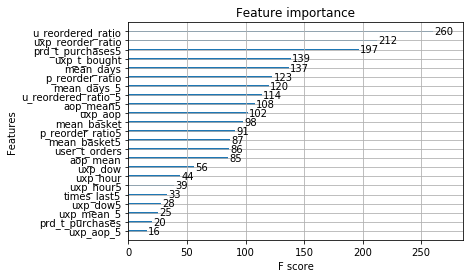

In [190]:
##########################################
#TRAIN MODEL

D_train = xgb.DMatrix(data=X_train, label = y_train)
D_test = xgb.DMatrix(data=data_test)
########################################
## SET BOOSTER'S PARAMETERS
########################################
parameters = {"objective":'binary:logistic',
    'eval_metric':'logloss', 
              "max_depth":9,
            "colsample_bytree":0.6,
            "subsample":0.7,
            "lambda": 0.95,
            "min_child_weight": 0.7,
            "eta": 0.075,
            "gamma": 6              
             }
########################################
########################################
model = xgb.train(params=parameters, dtrain= D_train, num_boost_round = 10 )
xgb.plot_importance(model)



In [ ]:
## OR set a custom threshold (in this problem, 0.21 yields the best prediction)
test_pred = (model.predict(D_test) >= 0.21)
test_pred[0:20] #display the first 20 predictions of the numpy array

In [ ]:
#Save the prediction in a new column in the data_test DF
data_test['prediction'] = test_pred
data_test.head()

In [ ]:
#Reset the index
final = data_test.reset_index()
#Keep only the required columns to create our submission file (Chapter 6)
final = final[['product_id', 'user_id', 'prediction']]
# Delete X_train , y_train
del [X_train, y_train]
gc.collect()
final.head()

In [ ]:
#
orders_test = orders.loc[orders.eval_set=='test',("user_id", "order_id") ]
orders_test.head()

In [ ]:
final = final.merge(orders_test, on='user_id', how='left')
final.head()

In [ ]:
#remove user_id column
final = final.drop('user_id', axis=1)
#convert product_id as integer
final['product_id'] = final.product_id.astype(int)

#Remove all unnecessary objects
del orders
del orders_test
gc.collect()

final.head()

In [ ]:
d = dict()
for row in final.itertuples():
    if row.prediction== 1:
        try:
            d[row.order_id] += ' ' + str(row.product_id)
        except:
            d[row.order_id] = str(row.product_id)

for order in final.order_id:
    if order not in d:
        d[order] = 'None'
        
gc.collect()

#We now check how the dictionary were populated (open hidden output)
d

In [ ]:
#Convert the dictionary into a DataFrame
sub = pd.DataFrame.from_dict(d, orient='index')

#Reset index
sub.reset_index(inplace=True)
#Set column names
sub.columns = ['order_id', 'products']

sub.head()

In [ ]:
#Check if sub file has 75000 predictions
sub.shape[0]

In [ ]:
#get csv
sub.to_csv('sub.csv', index=False)